In [1]:
DATA_NAME = 'approx1e5-pastis-wavelet-gray' # size-name-transform-channel
sample_max = int(1e5)

In [2]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()
Path(os.path.join(CWD, "plots", "ksplots")).mkdir(exist_ok=True)
CWD

'/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/results/case-studies/pastis/wavelet/approx1e5/gray'

In [3]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *

os.chdir(CWD)
np.random.seed(0)

In [4]:
data_dir = os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle')
group_data_map = pd.read_pickle(data_dir)
GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)
full_params = pd.read_csv(Path(os.path.join(CWD, "CSVs", "optimized_params.csv")), index_col='layer')[["total_samples", "initial_r", "initial_eta", "kstest_stat_initial"]]
full_params["total_samples"] = full_params["total_samples"].astype(int)
full_params

,total_samples,initial_r,initial_eta,kstest_stat_initial
layer,,,,
2,3180,0.42,5.7,0.018069
3,12720,0.51,7.3,0.004615
4,50880,0.44,1.4,0.006270
5,203520,0.47,0.2,0.005236
6,814080,0.51,-0.6,0.004349
7,3256320,0.97,-0.9,0.010413
8,13025280,1.44,-1.2,0.051520


Check Center Square
Center Square Passed


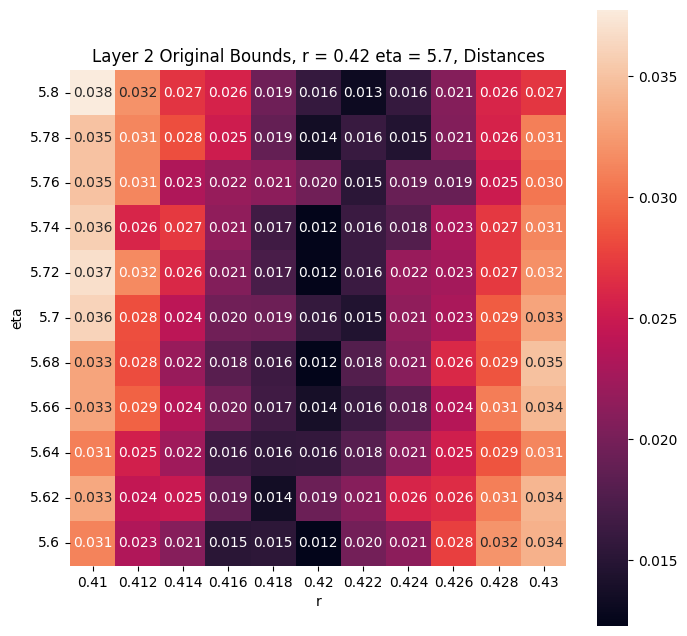

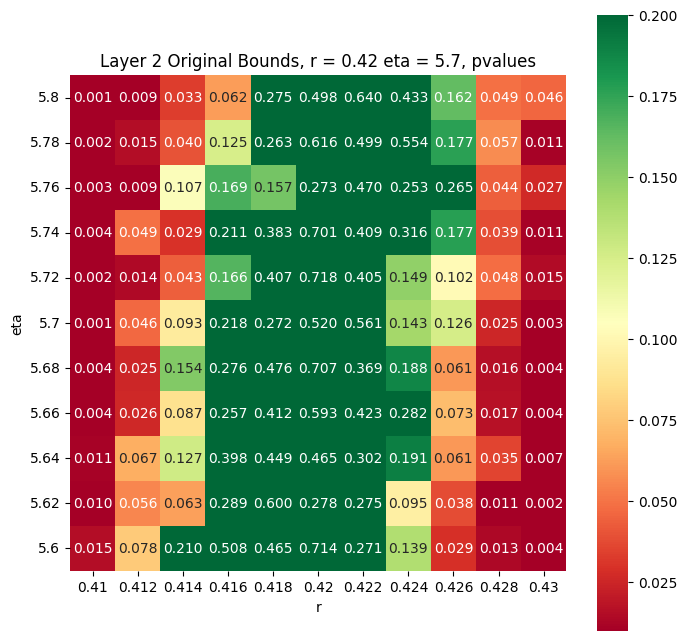

Running process with original bounds
Only 61.98347107438017% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
100.0% of tests passed using r_bound = 0.001, eta_bound = 0.01. Showing Heatmaps


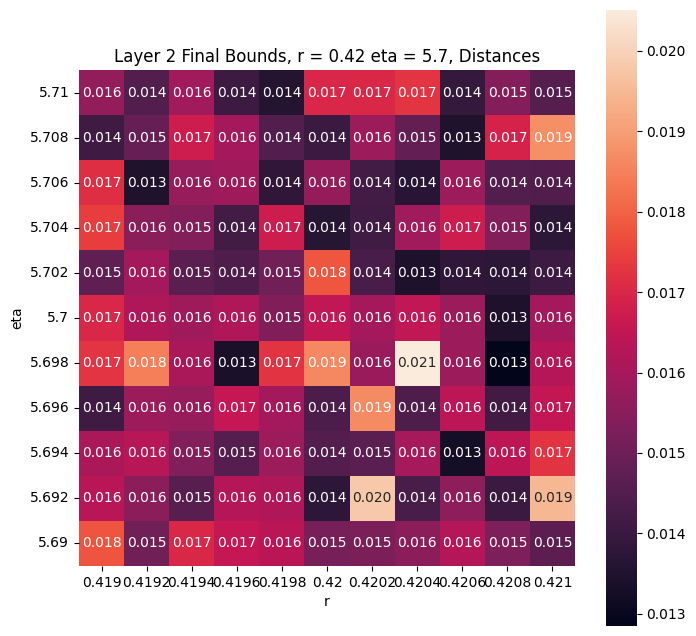

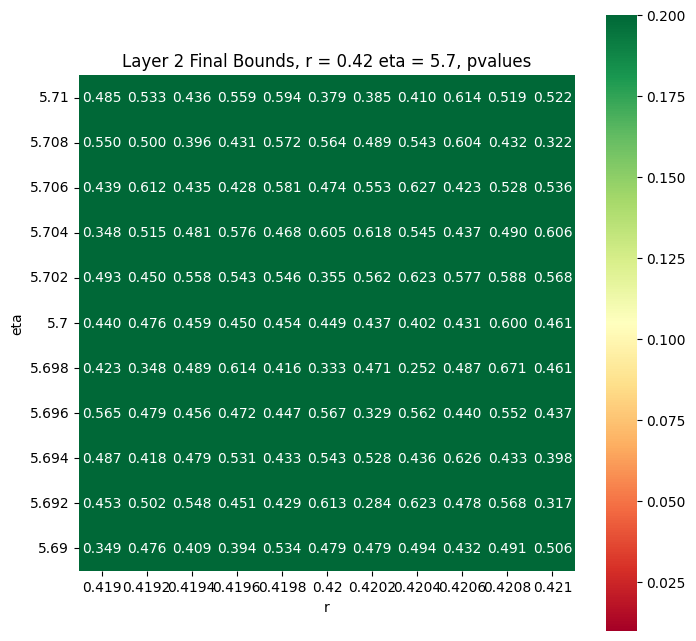

Check Center Square
Center Square Passed


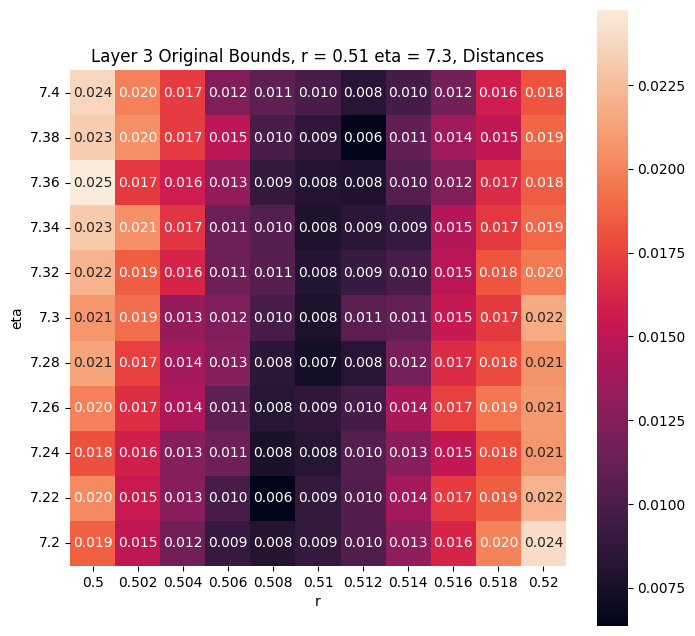

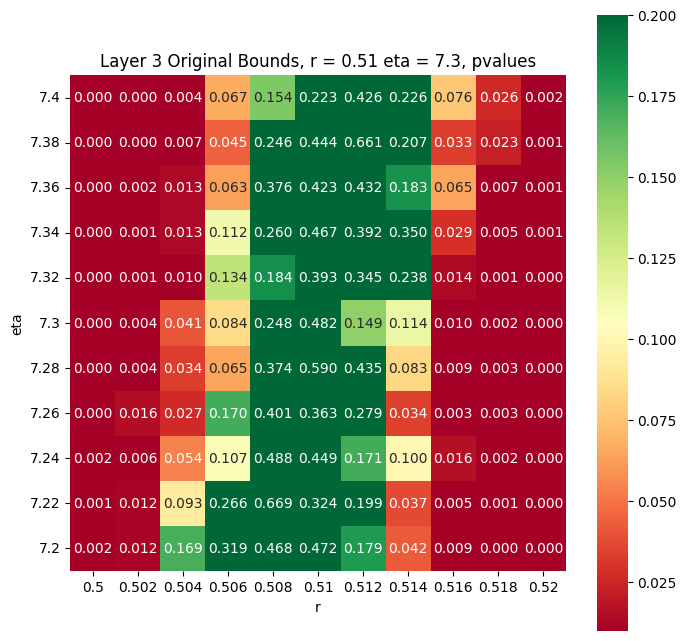

Running process with original bounds
Only 46.28099173553719% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
100.0% of tests passed using r_bound = 0.001, eta_bound = 0.01. Showing Heatmaps


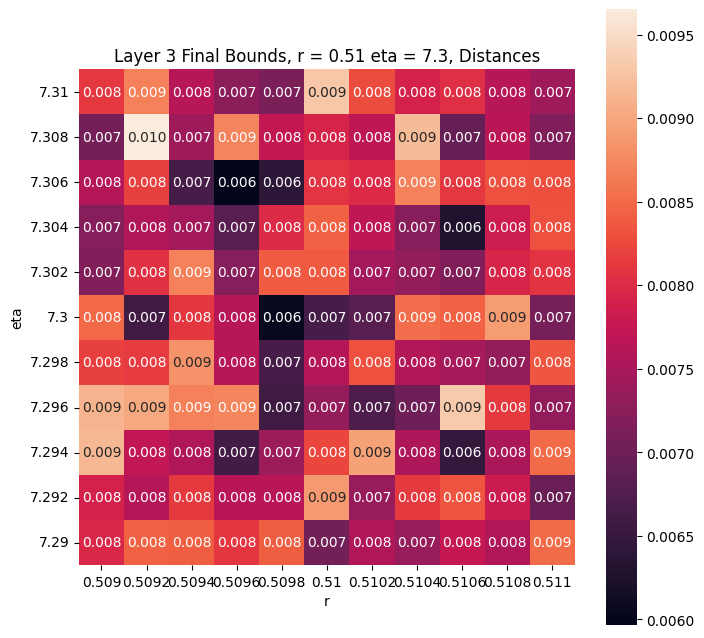

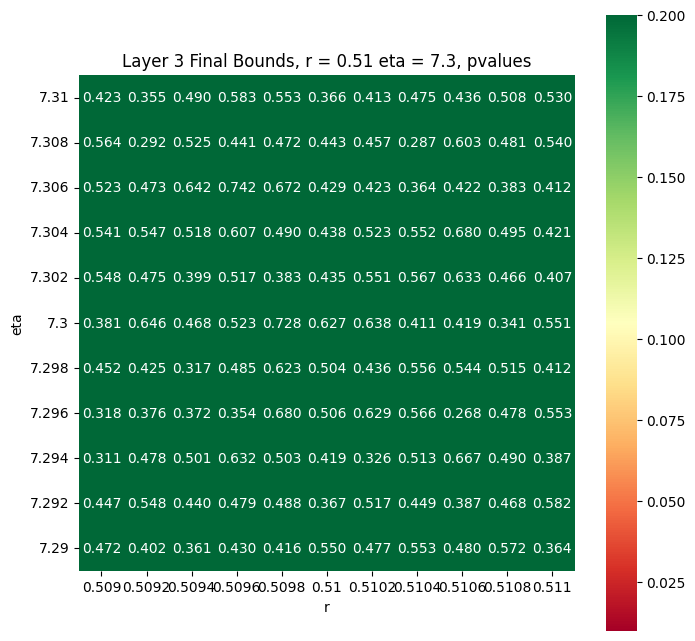

Check Center Square
Center Square Passed


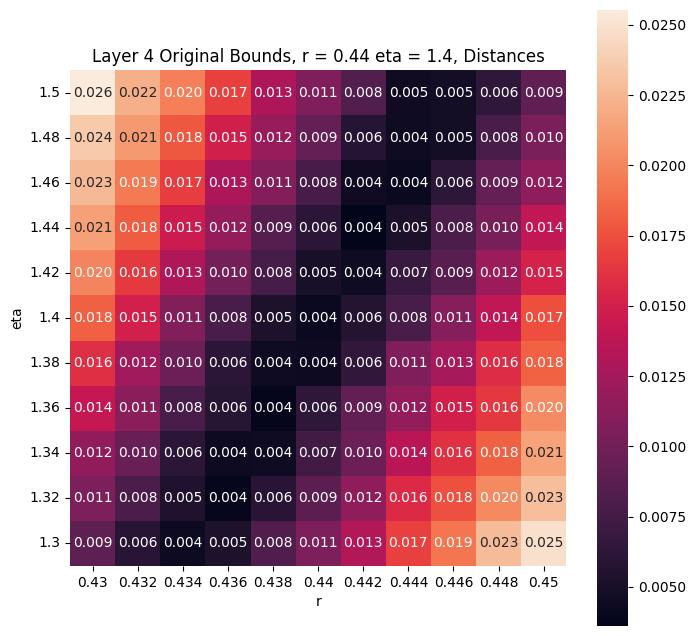

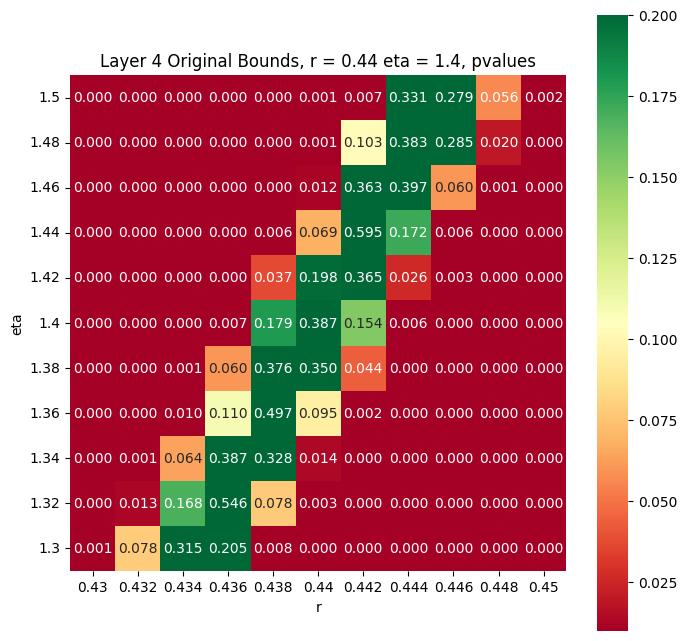

Running process with original bounds
Only 26.446280991735538% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
100.0% of tests passed using r_bound = 0.001, eta_bound = 0.01. Showing Heatmaps


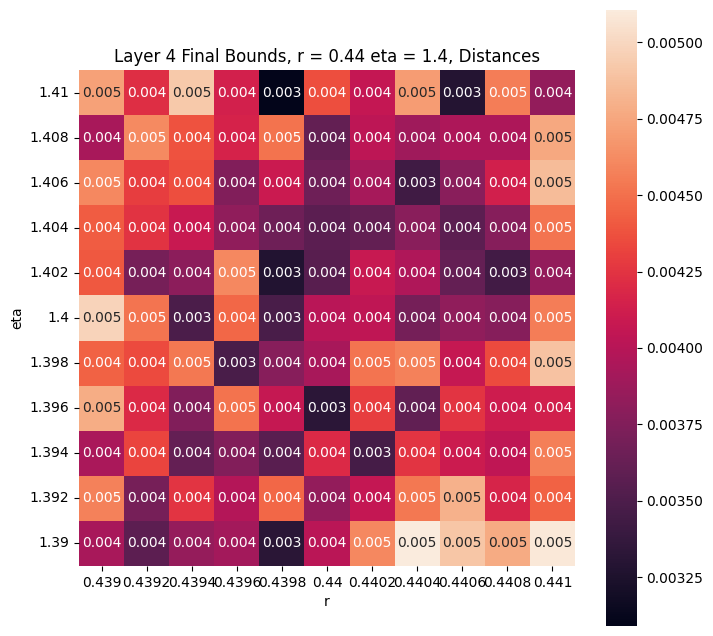

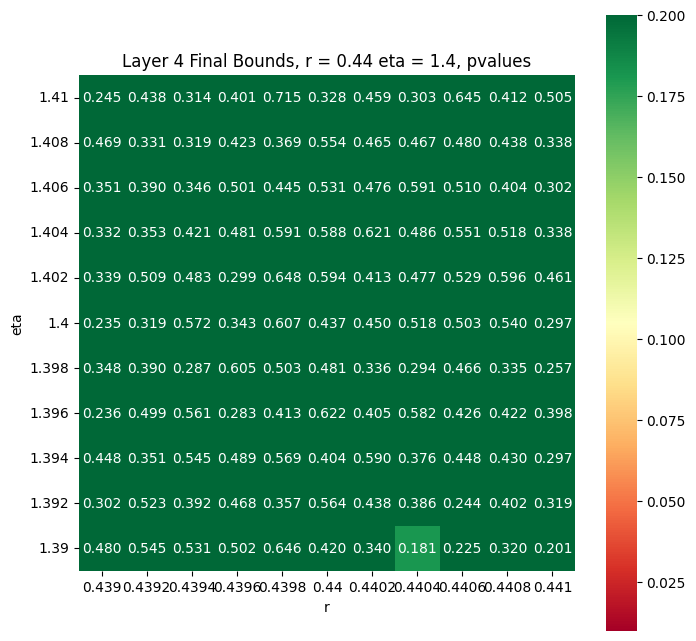

Check Center Square
Center Square Passed


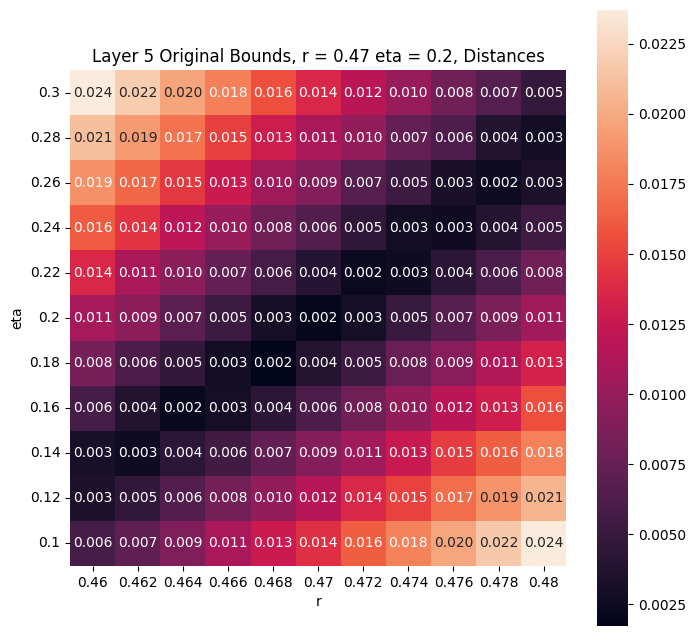

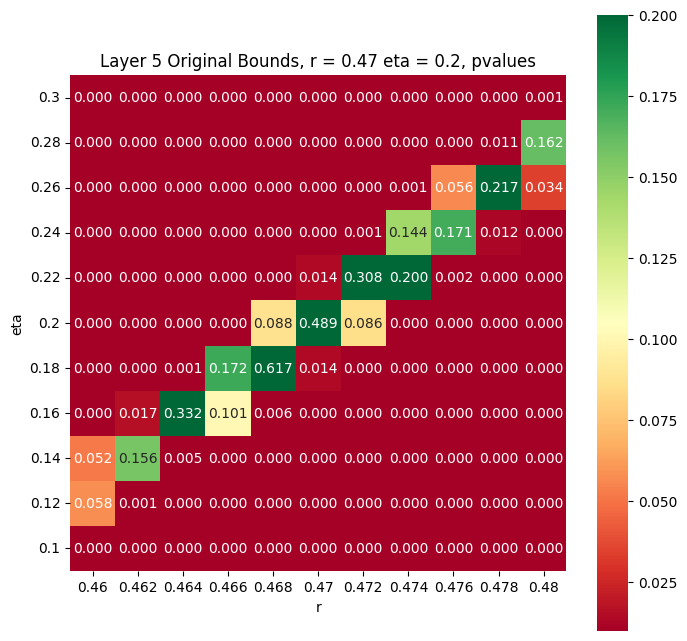

Running process with original bounds
Only 14.049586776859504% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
95.86776859504133% of tests passed using r_bound = 0.001, eta_bound = 0.01. Showing Heatmaps


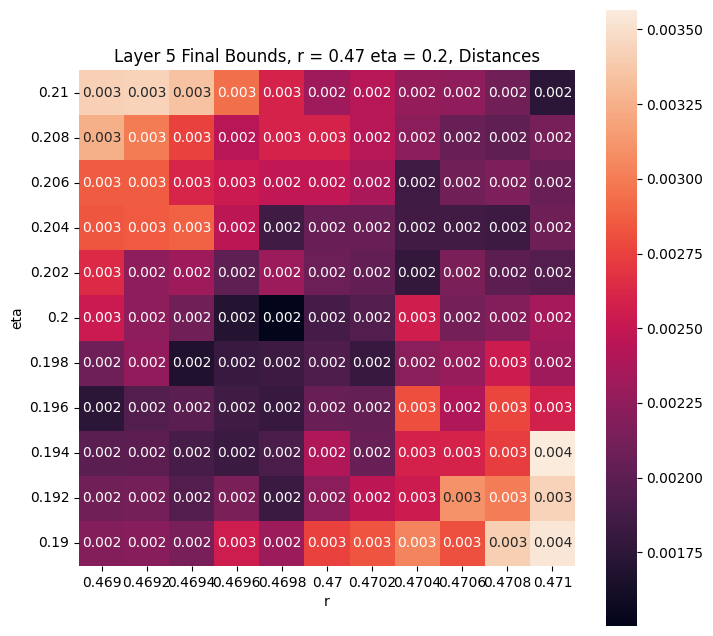

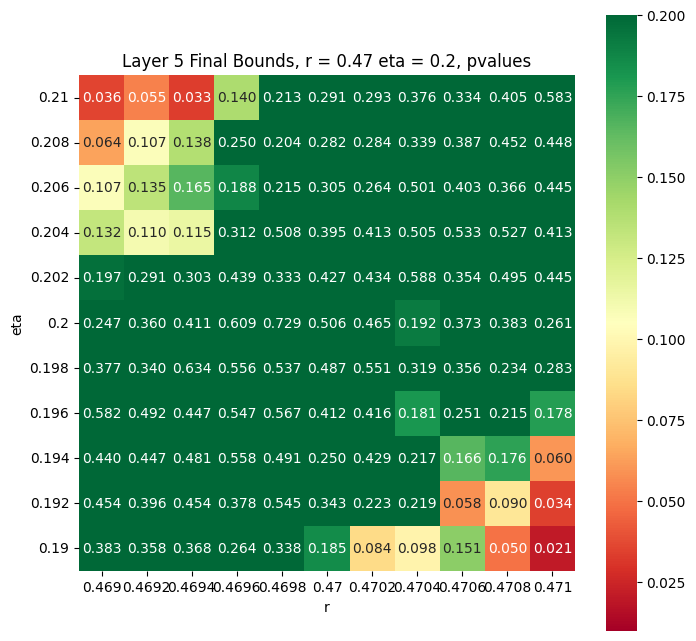

Check Center Square
Center Square Passed


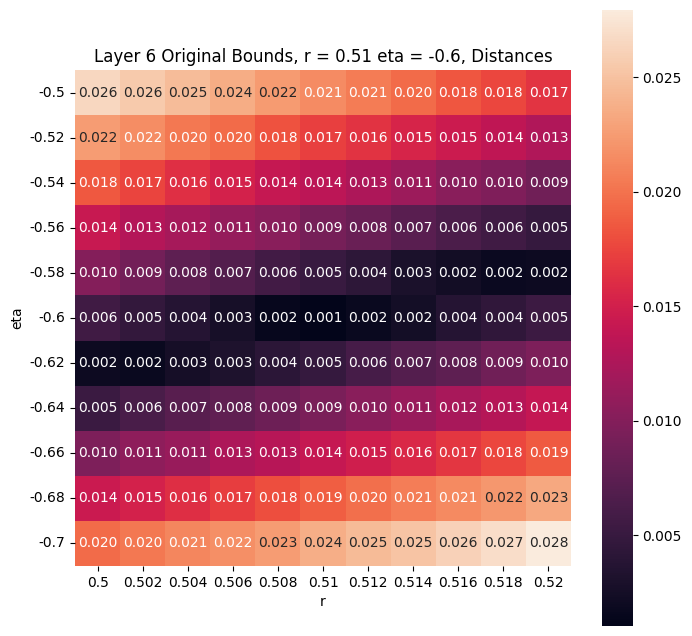

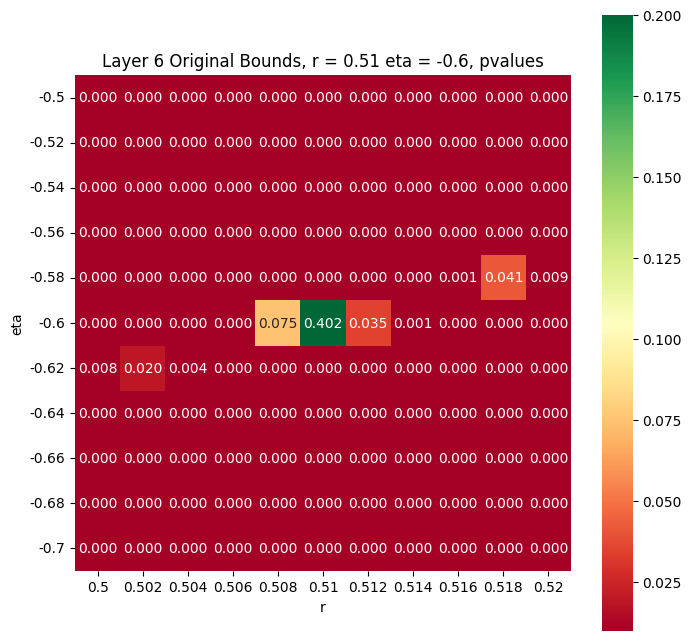

Running process with original bounds
Only 1.6528925619834711% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
Only 42.97520661157025% of tests passed using r_bound = 0.001, eta_bound = 0.01.Now running with lower r and eta bounds
Trying r_bound = 0.0001, eta_bound = 0.0001
100.0% of tests passed using r_bound = 0.0001, eta_bound = 0.001. Showing Heatmaps


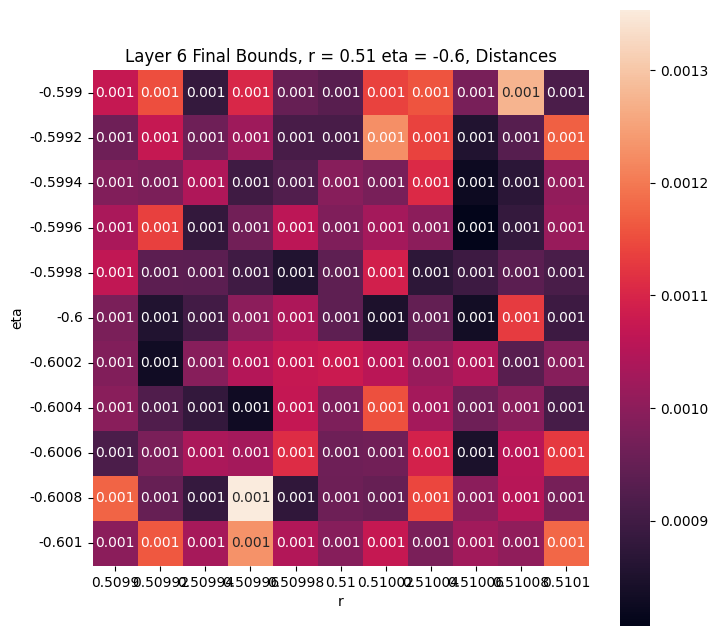

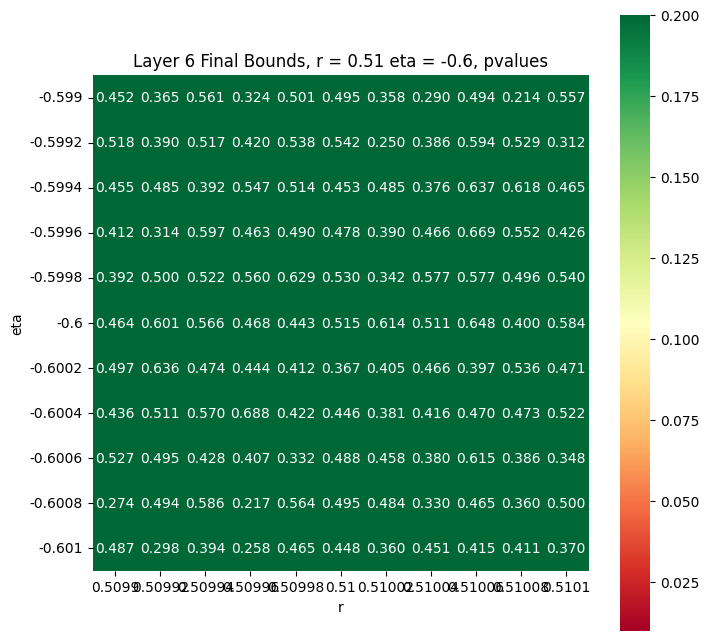

Check Center Square
Center Square Passed


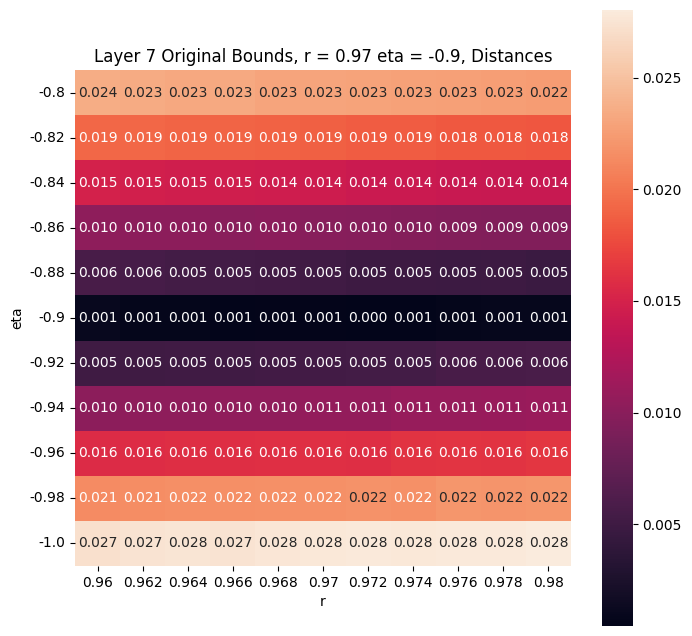

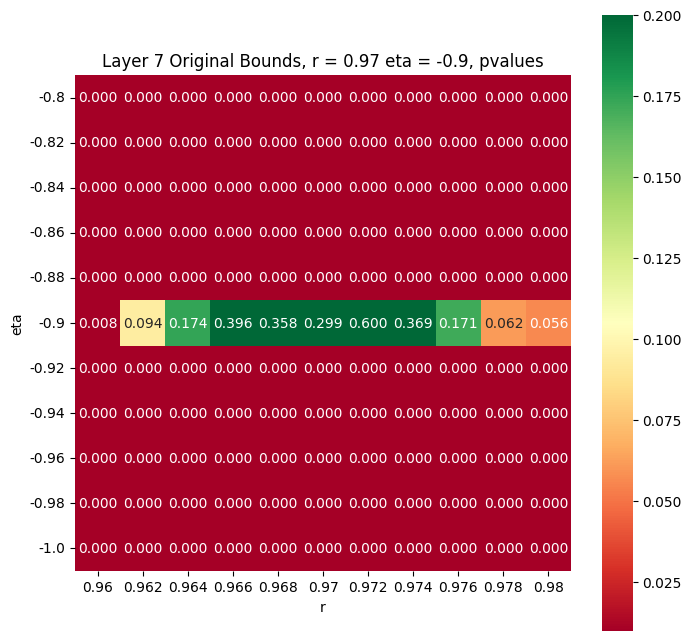

Running process with original bounds
Only 8.264462809917356% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.001, eta_bound = 0.001
Only 15.702479338842975% of tests passed using r_bound = 0.001, eta_bound = 0.01.Now running with lower r and eta bounds
Trying r_bound = 0.0001, eta_bound = 0.0001
100.0% of tests passed using r_bound = 0.0001, eta_bound = 0.001. Showing Heatmaps


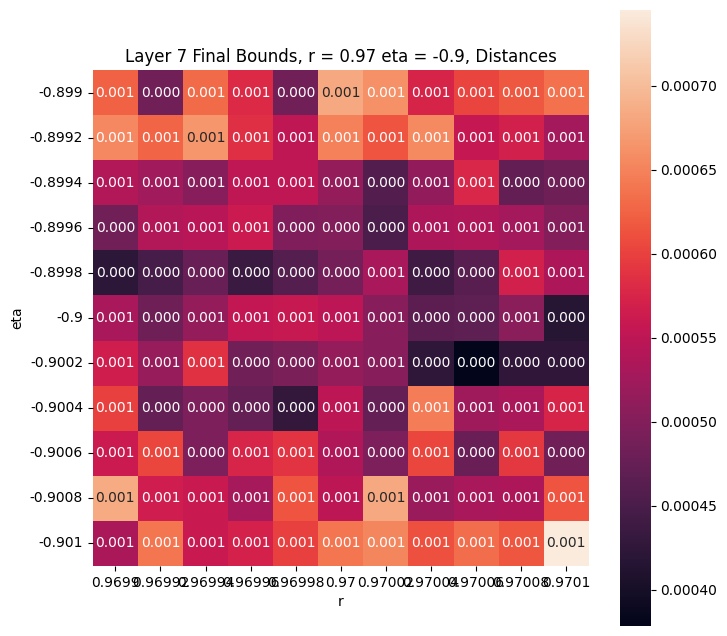

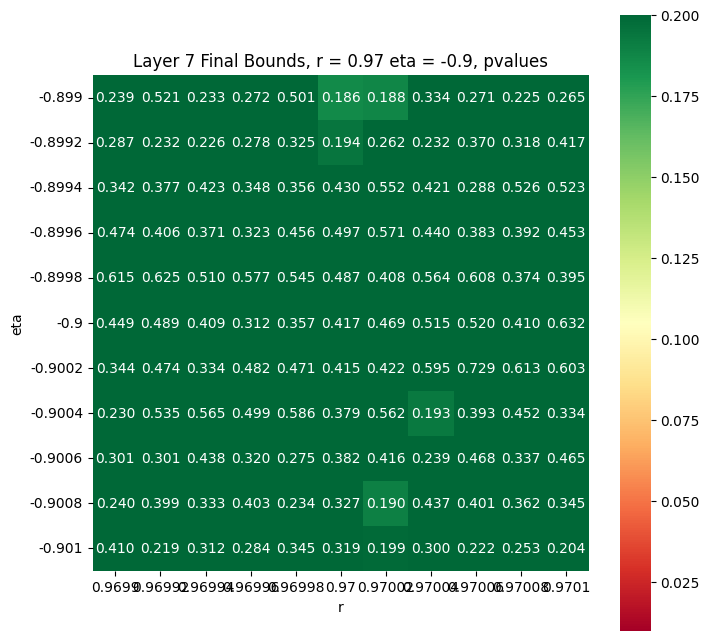

Check Center Square
Center Square Failed No Need to test the rest
      r  eta  distance  pvalue
0  1.44 -1.2   0.00191     0.0


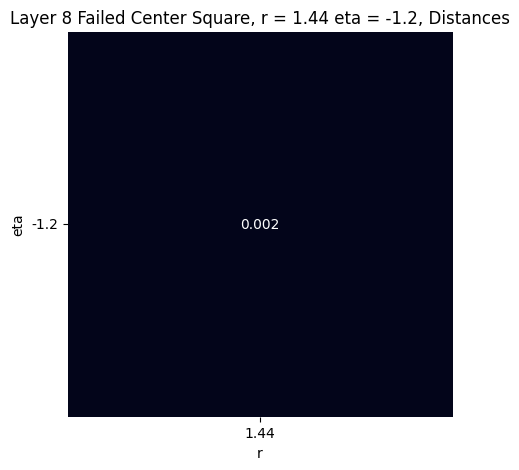

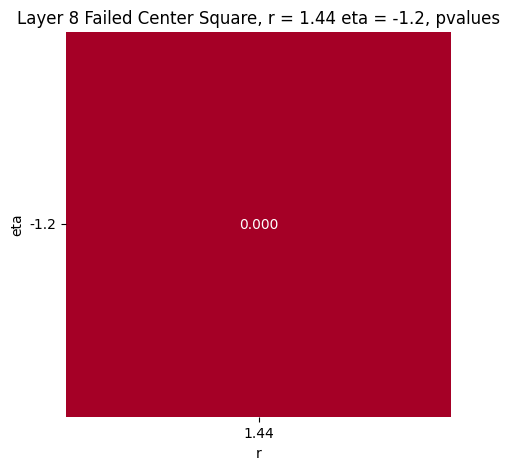

In [5]:
ks_output_df = pd.DataFrame(columns = ["layer", "inital_r_bound", "inital_eta_bound", "inital_pass_pct", "final_r_bound", "final_eta_bound", "final_pass_pct"])
for group in GROUPS:
    print(f"Testing Layer {group}")
    figs, output = KSHeatMapFullProcess(r = full_params.loc[group, 'initial_r'], eta = full_params.loc[group, 'initial_eta'], n = full_params.loc[group, 'total_samples'], ks_max = sample_max, iterations = 10, r_bound = 0.01, eta_bound=0.1, grid_amt = 5, rounded = 8, title = f"Layer {group}", return_vals = True, max_iterations = 5, parallelize = True)
    figs[0][0].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_Plot_layer_{group}_initial_distances.jpg"), bbox_inches = 'tight', dpi=600)
    figs[0][1].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_plot_layer_{group}_initial_dvalues.jpg"), bbox_inches = 'tight', dpi=600)
    figs[1][0].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_plot_layer_{group}_final_distances.jpg"), bbox_inches = 'tight', dpi=600)
    figs[1][1].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_plot_layer_{group}_final_pvalues.jpg"), bbox_inches = 'tight', dpi=600)
    ks_output_df.loc[len(ks_output_df)] = [group] + output


In [6]:
ks_output_df.to_csv(os.path.join(CWD, "CSVs", 'KS_plot_df.csv'))
ks_output_df

,layer,inital_r_bound,inital_eta_bound,inital_pass_pct,final_r_bound,final_eta_bound,final_pass_pct
0,2.0,0.01,0.1,0.619835,0.0010,0.010,1.000000
1,3.0,0.01,0.1,0.462810,0.0010,0.010,1.000000
2,4.0,0.01,0.1,0.264463,0.0010,0.010,1.000000
3,5.0,0.01,0.1,0.140496,0.0010,0.010,0.958678
4,6.0,0.01,0.1,0.016529,0.0001,0.001,1.000000
5,7.0,0.01,0.1,0.082645,0.0001,0.001,1.000000
6,8.0,0.00,0.0,0.000000,NaN,NaN,NaN


Check Center Square
Center Square Failed No Need to test the rest
      r  eta  distance  pvalue
0  1.44 -1.2  0.001938     0.0


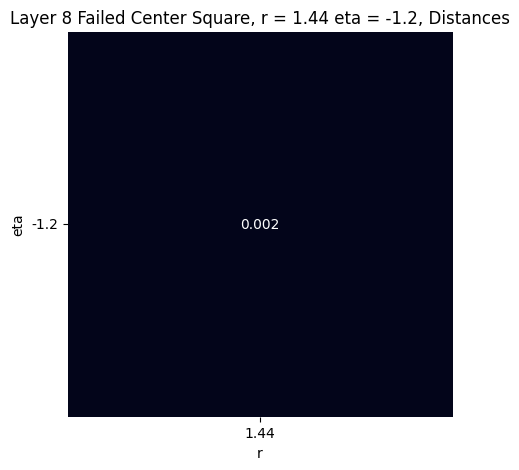

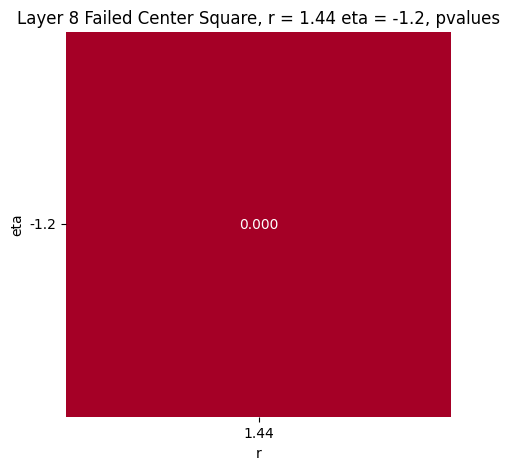

In [7]:
sample_max_new = int(1e8)
group = 8
figs, output = KSHeatMapFullProcess(r = full_params.loc[group, 'initial_r'], eta = full_params.loc[group, 'initial_eta'], n = full_params.loc[group, 'total_samples'], ks_max = sample_max_new, iterations = 10, r_bound = 0.01, eta_bound=0.1, grid_amt = 5, rounded = 6, title = f"Layer {group}", return_vals = True, max_iterations = 6, parallelize = True)

In [8]:
n = full_params.loc[group, 'total_samples']
n < sample_max_new

True